# Рубежный контроль №2
# по теме: "Методы построения моделей машинного обучения."
### Студент:
Алпеев Владислав
### Группа:
ИУ5-64Б
### Вариант:
1

## Выполенние:

Загрузим указанный в задании датасет.

In [8]:
import pandas as pd
import numpy as np

from sklearn.datasets import *

boston = load_boston()
pd_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
pd_boston['target'] = pd.Series(boston.target)
pd_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Рассмотрим корреляцию признаков в датасете.

<AxesSubplot:>

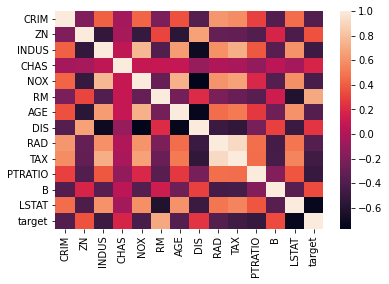

In [10]:
import seaborn as sns

sns.heatmap(pd_boston.corr())

Целевой признак сильно коррелирует с LSTAT, поэтому рассмотрим эту пару.

Разделим выборку на обучающую и тестовую части:

In [24]:
from sklearn.model_selection import train_test_split
boston_X_train, boston_X_test, boston_Y_train, boston_Y_test = train_test_split(
    pd_boston['LSTAT'].values, boston.target, test_size=0.3, random_state=1)

##### 1) Построим модель методом Линейной регрессии:

In [25]:
from sklearn.linear_model import LinearRegression

# Обучим модель линейной регрессии
reg1 = LinearRegression().fit(boston_X_train.reshape(-1, 1), boston_Y_train.reshape(-1, 1))

Построим график функции с полученными коэффициентами 

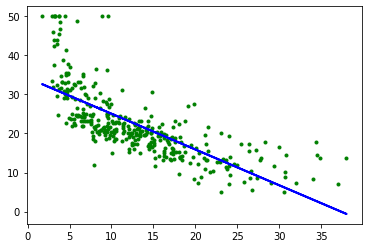

In [28]:
import matplotlib.pyplot as plt

y_array_regr = [reg1.coef_[0]*x+reg1.intercept_[0] for x in boston_X_train]

plt.plot(boston_X_train, boston_Y_train, 'g.')
plt.plot(boston_X_train, y_array_regr, 'b', linewidth=2.0)
plt.show()

Видно, что график примерно проходит через облако точек, но при этом находится в отдалении от больших скоплений. 

Определим значения целевого признака для тестовой выборки и оценим качеcтво полученной модели.

In [38]:
target1 = reg1.predict(boston_X_test.reshape(-1, 1))

Обе метрики используются для решаемой нами задачи регрессии.

Используем метрику Root mean squared error. Данная метрика позволяет не учитывать знак, то есть направление отлонения и при этом не оставлять квадрат этого отклонения.

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(boston_Y_test, target1, squared=False)

6.528418144661057

Так же используем метрику R^2, потому как это единственная нормированная метрика, что позволяет более корректно оценить степень отклонения. Кроме того, так как мы будем оценивать одинаковые выборки с одинаковым количеством параметров, коэффициент будет высчитываться одинакого корректно.

In [36]:
from sklearn.metrics import r2_score

r2_score(boston_Y_test, target1)

0.5349901044757204

##### 2) Построим модель методом Градиентного бустинга:

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

reg2 = GradientBoostingRegressor(random_state=1)
reg2.fit(boston_X_train.reshape(-1, 1), boston_Y_train)

GradientBoostingRegressor(random_state=1)

In [44]:
target2 = reg2.predict(boston_X_test.reshape(-1, 1))

In [47]:
mean_squared_error(boston_Y_test, target2, squared=False)


6.081217778307466

In [48]:
r2_score(boston_Y_test, target2)

0.5965150115768167

##### Вывод

В результате проведения исследования видим, что медиана ошибок уменьшается, а оценка R^2 так же показывает улучшение модели. Следовательно можем сделать вывод, что градиентный бустинг показывает себя лучше.